In [8]:
import os
os.environ["LOGURU_LEVEL"] = "INFO"

from ect.tracking import (
    Tracker, 
    NaiveMatcher, 
    FFTTransformer, 
    FECTTransformer, 
    FECTCorrTransformer, 
    AbsoluteCartesianTracer as PositionTracer
)

from ect.helpers import SequenceImageGenerator, IdSequenceImageGenerator
from ect import Config

from typing import Callable

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import magma, gist_heat

In [9]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 13)
t = FFTTransformer()
# p = PositionTracer(transformer=t)
m = NaiveMatcher(    
    gt = (270, 200),
    template_shape=(150, 150),
    transformer=t, thresh=0.01)

tracker = Tracker(generator=g, matcher=m)#, callback=p.callback)

In [10]:
def center(inp: np.ndarray, invfunc: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
    X, Y = inp.shape
    inp = invfunc(inp)
    out = np.zeros_like(inp)
    out[:X//2, :Y//2] = inp[X//2:, Y//2:]
    out[X//2:, :Y//2] = inp[:X//2, Y//2:]
    out[X//2:, Y//2:] = inp[:X//2, :Y//2]
    out[:X//2, Y//2:] = inp[X//2:, :Y//2]
    return out

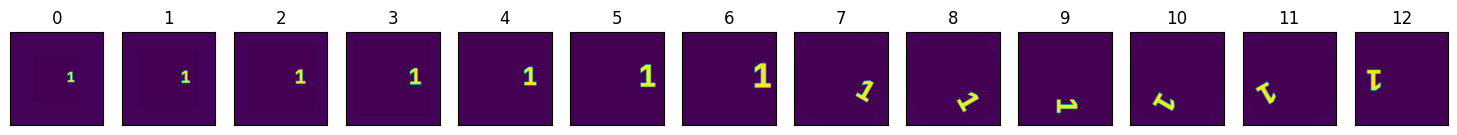

In [11]:

plt.figure(figsize=(20,5))

for idx, image in enumerate(g.images()):
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

In [12]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 13)
# g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/bag/color/{id:08d}.jpg", 10)

t = FECTCorrTransformer(Config(offset_value_px=5), (180, 50))
# p = PositionTracer(transformer=t)
m = NaiveMatcher(
    gt = (200, 200),
    template_shape=(400, 400),
    transformer=t, thresh=0.1, logpolar=True, offset=5,
    do_update_template=False)

# for i in g.images():
#     m.initialize(i)
#     break

# plt.imshow(i)
# plt.imshow(np.abs(t.invert(m.template)))

ic| dy: 0, dx: 2
ic| x: 206, y: 200
ic| dy: 3, dx: 2
ic| x: 212, y: 200
ic| dy: 2, dx: 3
ic| x: 218, y: 200
ic| dy: 2, dx: 4
ic| x: 225, y: 200
ic| dy: 2, dx: 6
ic| x: 233, y: 200
ic| dy: 2, dx: 7
ic| x: 242, y: 200
ic| dy: 21, dx: 4
ic| x: 248, y: 201
ic| dy: 37, dx: 5
ic| x: 243, y: 203
ic| dy: 52, dx: 10
ic| x: 236, y: 211
ic| dy: 61, dx: 10
ic| x: 227, y: 218
ic| dy: 76, dx: 10
ic| x: 215, y: 221
ic| dy: 62, dx: 9
ic| x: 207, y: 226


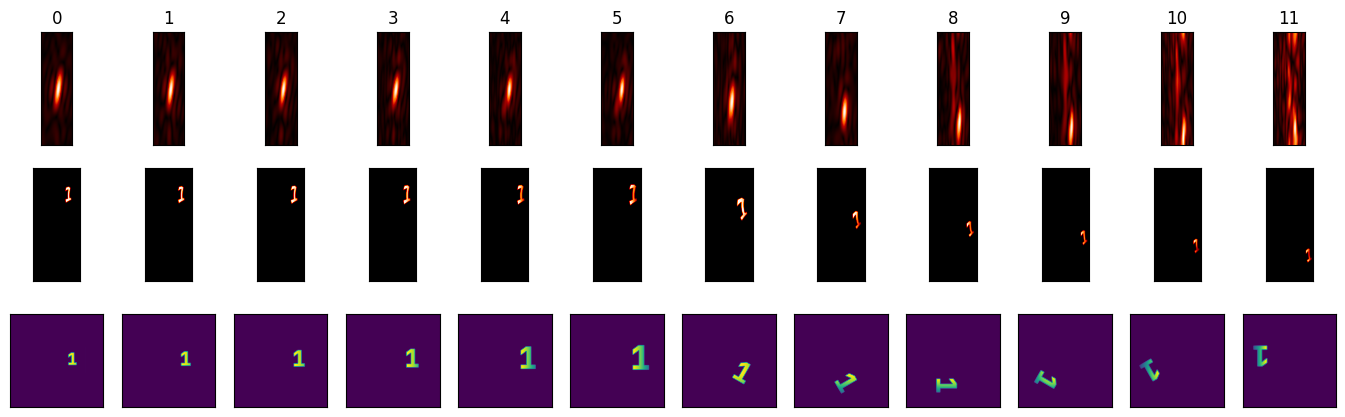

In [13]:
from ect import logpolar_new

tracker = Tracker(generator=g, matcher=m)

plt.figure(figsize=(20,5))

# inv = lambda x: ilogpolar_new(np.abs(np.fft.ifft2(x)), (400, 400), 200, Config(start_angle_deg=0, offset_value_px=0))
inv = lambda x: np.abs(np.fft.ifft2(x))

for idx, images in enumerate(tracker.track()):
    # print(idx)
    plt.subplot(3, 14, idx+1)
    plt.title(idx)
    plt.imshow(center(images[1], inv), cmap=gist_heat)
    # plt.imshow(inv(images[0]))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 29+idx)
    plt.imshow(images[2])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 15+idx)
    plt.imshow(logpolar_new(images[2].copy(), (200, 200), (360, 150), 200, Config(offset_value_px=0)), cmap=gist_heat)
    plt.xticks([])
    plt.yticks([])

